0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


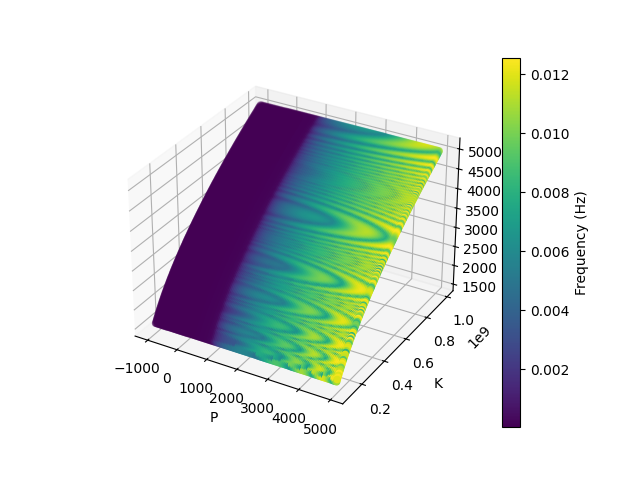

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D

def singSyllable(K,P):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs) #time sample points
    
    
    # main diff equation
    def syrinx(y, t):
        b = 1000
        d = 10**8
        yprime = np.zeros(2)
        yprime[0] = y[1]
        yprime[1] = (P - b) * y[1] - K * y[0] - d * (y[0]**2) * y[1]
        return yprime
    
    # init condition
    y0 = [0.01, 0.01]
    
    # ode solver
    z = odeint(syrinx, y0, t)
    song = z[:, 0]
    
    return t, song

def fft_max(K,P):
    Fs = 22050
    t, song = singSyllable(K,P)
    t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]
    s_fft = fft(song)
    sng = 2.0/len(t) * np.abs(s_fft[0:len(t)//2])
    return t_fft[np.argmax(sng)], np.max(sng)

# Define parameter ranges
K = np.arange(10**8, 10**9, 5*10**6)
P = np.arange(-1000, 5000, 50)

# Compute frequencies and amplitudes
Freq = np.zeros((len(P), len(K)))
Amp = np.zeros((len(P), len(K)))
for j, k in enumerate(K):
    for i, p in enumerate(P):
        freq, amp = fft_max(k, p)
        Freq[i, j] = freq
        Amp[i, j] = amp
    print(j)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
K_mesh, P_mesh = np.meshgrid(K, P)
sc = ax.scatter(P_mesh, K_mesh, Freq, c=Amp, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Frequency (Hz)')

# Set labels
ax.set_xlabel('P')
ax.set_ylabel('K')
ax.set_zlabel('Frequency (Hz)')

plt.show()


In [17]:
from tempfile import TemporaryFile
freq = TemporaryFile()
amp = TemporaryFile()

np.save('freq.npy', Freq)

np.save('amp.npy', Amp)

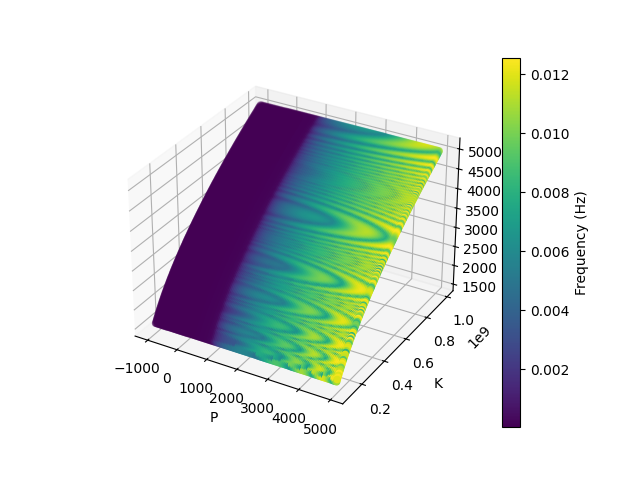

In [35]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
Freq1 = np.load('freq.npy')
Amp1 = np.load('amp.npy')

K = np.arange(10**8, 10**9, 5*10**6)
P = np.arange(-1000, 5000, 50)

K_mesh, P_mesh = np.meshgrid(K, P)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
K_mesh, P_mesh = np.meshgrid(K, P)
sc = ax.scatter(P_mesh, K_mesh, Freq1, c=Amp1, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Frequency (Hz)')

# Set labels
ax.set_xlabel('P')
ax.set_ylabel('K')
ax.set_zlabel('Frequency (Hz)')

plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D

def singSyllable(K,P):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs) #time sample points
    
    
    # main diff equation
    def syrinx(y, t):
        a  = 2*10**(-4)
        #m  = 0.4*10**(-9)
        b1 = 4.44*10**(-5)
        c  = 1.6*10**(-2)
        f0 = 0.0399
        tau= 5*10**(-6)
        a1 = 0.1
        a2 = 0.11
        k2 = 400
        b2 = 4*10**(-11)
        yprime = np.zeros(2)
        yprime[0] = y[1]
        yprime[1] = (10**8)*25*(-(K+k2*y[0]**2)*y[0]+f0 -(b1+b2*y[1]**2)*y[1]-c*y[0]**2*y[1]+a*P((a1-a2)+2*tau*y[1])/(a1+y[0]+tau*y[1]))
        return yprime
    
    # init condition
    y0 = [0.01, 0.01]
    
    # ode solver
    z = odeint(syrinx, y0, t)
    song = z[:, 0]
    
    return t, song

def fft_max(K,P):
    Fs = 22050
    t, song = singSyllable(K,P)
    t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]
    s_fft = fft(song)
    sng = 2.0/len(t) * np.abs(s_fft[0:len(t)//2])
    return t_fft[np.argmax(sng)], np.max(sng)

# Define parameter ranges
K = np.arange(.30, .5, .01)
P = np.arange(1996, 2006, 1)

# Compute frequencies and amplitudes
Freq = np.zeros((len(P), len(K)))
Amp = np.zeros((len(P), len(K)))
for j, k in enumerate(K):
    for i, p in enumerate(P):
        freq, amp = fft_max(k, p)
        Freq[i, j] = freq
        Amp[i, j] = amp
    print(j)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
K_mesh, P_mesh = np.meshgrid(K, P)
sc = ax.scatter(P_mesh, K_mesh, Freq, c=Amp, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Frequency (Hz)')

# Set labels
ax.set_xlabel('P')
ax.set_ylabel('K')
ax.set_zlabel('Frequency (Hz)')

plt.show()


TypeError: 'numpy.int64' object is not callable